In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [5]:
mhhi=pd.read_csv('MedianHouseholdIncome2015.csv',encoding="windows-1252")

In [9]:
mhhi.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [17]:
import chardet
with open('PoliceKillingsUS.csv','rb')as rawdata:
    result=chardet.detect(rawdata.read(1000))
    
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [35]:
police=pd.read_csv('PoliceKillingsUS.csv',encoding='windows-1252')
ppbpl=pd.read_csv('PercentagePeopleBelowPovertyLevel.csv',encoding='windows=1252')
percent_over_25=pd.read_csv('PercentOver25CompletedHighSchool.csv',encoding='windows-1252')
src=pd.read_csv('ShareRaceByCity.csv',encoding='windows-1252')




In [36]:
ppbpl

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
5,AL,Alabaster city,11.2
6,AL,Albertville city,26.7
7,AL,Alexander City city,30.4
8,AL,Alexandria CDP,9.7
9,AL,Aliceville city,41.3


In [26]:
ppbpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [28]:
ppbpl['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

## Barplot
#### Average property rate of each state

In [38]:
#Poverty rate of each state
ppbpl.poverty_rate.replace(['-'],0.0,inplace=True)
ppbpl.poverty_rate=ppbpl.poverty_rate.astype(float)
area_list=list(ppbpl['Geographic Area'].unique())
area_poverty_ratio=[]
for i in area_list:
    x=ppbpl[ppbpl['Geographic Area']==i]
    area_poverty_rate=sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)


In [42]:
data=pd.DataFrame({'area_list':area_list,'area_poverty_ratio':area_poverty_ratio})
new_index=(data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data=data.reindex(new_index)


In [43]:
new_index

array([24,  2, 10,  3, 31, 18, 40, 48,  0, 36, 17, 25, 42, 33, 43,  1, 12,
        8, 22,  9, 19,  4, 37, 26, 41, 14, 35, 47, 16, 46, 13, 45, 23, 11,
        5, 27, 49, 29,  7, 38, 28, 15, 34, 44, 32, 39, 20, 21,  6, 50, 30])

Text(0.5,1,'Poverty Rate Given States')

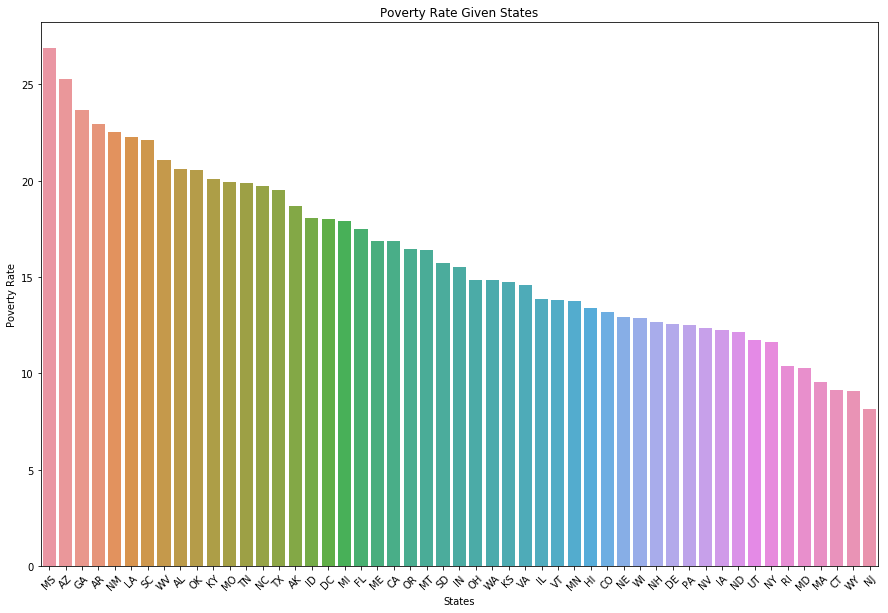

In [45]:
#visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'],y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [46]:
police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [47]:
police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [52]:
separate=police.name[police.name!='AB AB'].str.split()
a,b=zip(*separate)
name_list=a+b
name_count=Counter(name_list)
most_common_names=name_count.most_common(15)
x,y=zip(*most_common_names)
x,y=list(x),list(y)


Text(0.5,1,'Most common 15 name or surname of killed people')

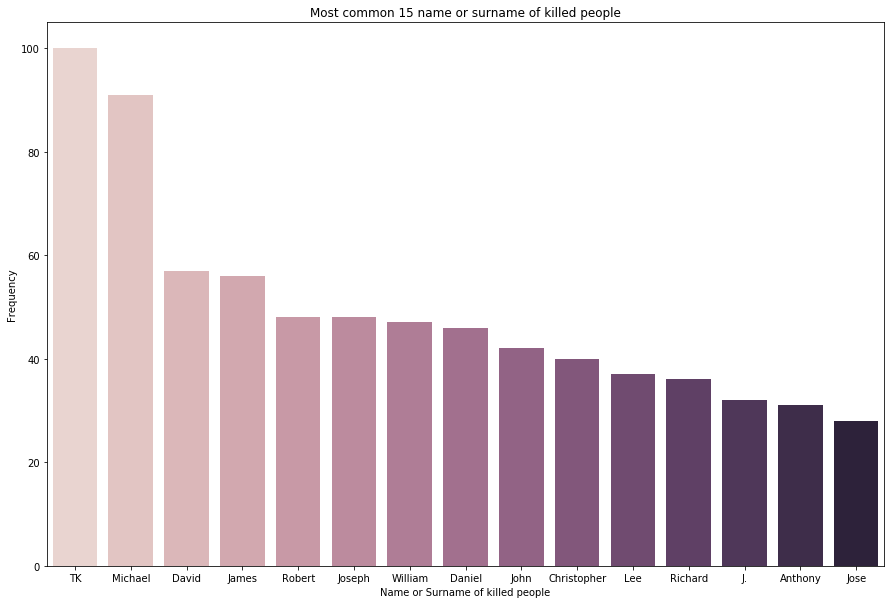

In [53]:
#visualization
plt.figure(figsize=(15,10))
ax=sns.barplot(x=x,y=y,palette=sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 name or surname of killed people')

In [54]:
percent_over_25.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [55]:
percent_over_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [58]:
#High school graduation rate of the population that is older than 25 in states
percent_over_25.percent_completed_hs.replace(['-'],0.0,inplace=True)
percent_over_25.percent_completed_hs=percent_over_25.percent_completed_hs.astype(float)
area_list=list(percent_over_25['Geographic Area'].unique())
area_highschool=[]
for i in area_list:
    x=percent_over_25[percent_over_25['Geographic Area']==i]
    area_highschool_rate=sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)


In [59]:
data=pd.DataFrame({'area_list':area_list,'area_highschool_rate':area_highschool})
new_index=(data['area_highschool_rate'].sort_values(ascending=True)).index.values
sorted_data2=data.reindex(new_index)



Text(0.5,1,"Percentage of Given State's Population Above 25 that Has Graduated High School")

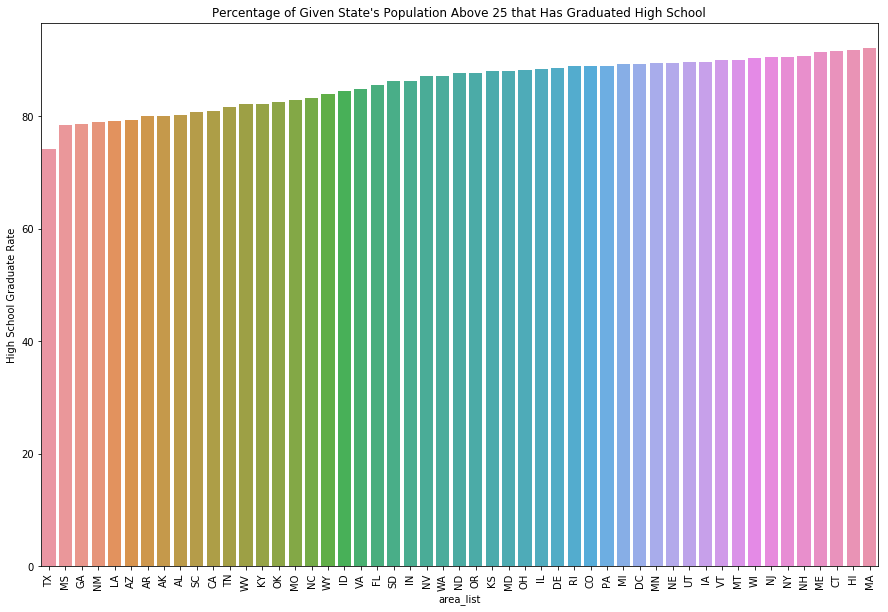

In [60]:
#visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'],y=sorted_data2['area_highschool_rate'])
plt.xticks(rotation=90)
plt.ylabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

In [61]:
src.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [62]:
src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


In [66]:
#Percentage of state's population according to races that are black,white,native american, asian and hispanic

src.isnull().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [94]:
src.replace(['(X)'],0.0,inplace=True)
src.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']]=src.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
area_list=list(src['Geographic area'].unique())
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]
    


In [95]:
src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null float64
share_black              29268 non-null float64
share_native_american    29268 non-null float64
share_asian              29268 non-null float64
share_hispanic           29268 non-null float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [96]:

for i in area_list:
    x=src[src['Geographic area']==i]
    share_white1=sum(x.share_white)/len(x)
    share_black1=sum(x.share_black)/len(x)
    share_native_american1=sum(x.share_native_american)/len(x)
    share_asian1=sum(x.share_asian)/len(x)
    share_hispanic1=sum(x.share_hispanic)/len(x)
    share_white.append(share_white1)
    share_black.append(share_black1)
    share_native_american.append(share_native_american1)
    share_asian.append(share_asian1)
    share_hispanic.append(share_hispanic1)

[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's Population According to Races")]

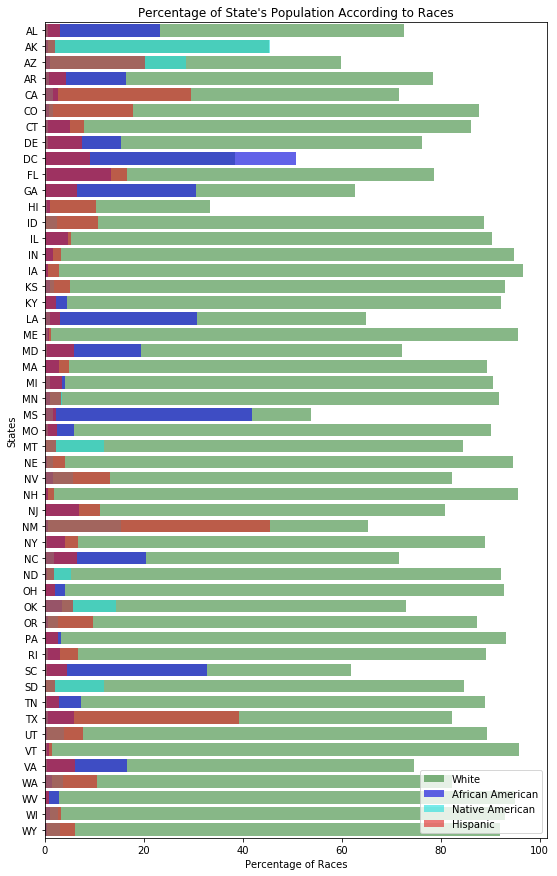

In [97]:
#visualization
f,ax=plt.subplots(figsize=(9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha=0.5,label='White')
sns.barplot(x=share_black,y=area_list,color='blue',alpha=0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha=0.6,label='Native American')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha=0.6,label='Hispanic')

ax.legend(loc='lower right',frameon= True)
ax.set(xlabel='Percentage of Races',ylabel='States',title="Percentage of State's Population According to Races")




## Point Plot

In [100]:
#high school graduation rate vs property rate of each state
sorted_data['area_poverty_ratio']=sorted_data['area_poverty_ratio']/max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_rate']=sorted_data2['area_highschool_rate']/max(sorted_data2['area_highschool_rate'])
data4=pd.concat([sorted_data,sorted_data2['area_highschool_rate']],axis=1)
data4.sort_values('area_poverty_ratio',inplace=True)



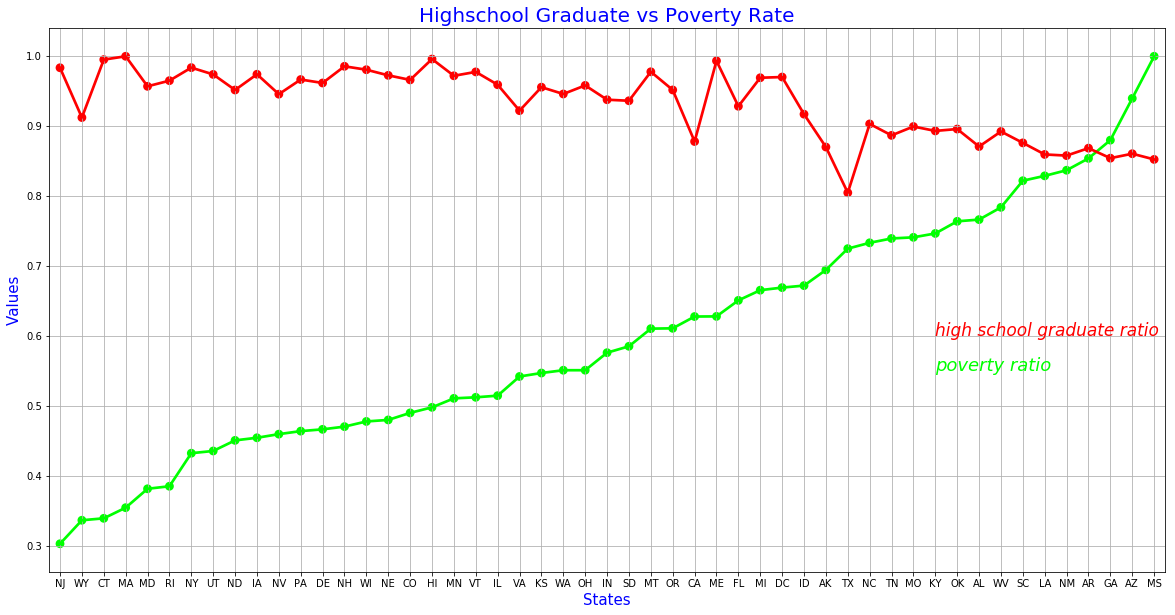

In [101]:
#visualization
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data4,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_rate',data=data4,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize=17,style='italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize=18,style='italic')
plt.xlabel('States',fontsize=15,color='blue')
plt.ylabel('Values',fontsize=15,color='blue')
plt.title('Highschool Graduate vs Poverty Rate',fontsize=20,color='blue')
plt.grid()

## Joint Plot

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


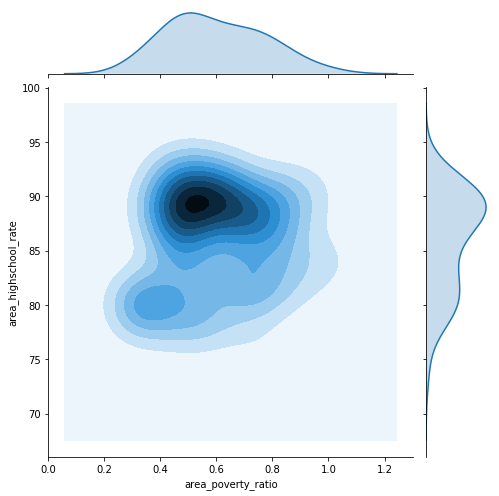

In [102]:
#visualization of highschool graduation rate vs Poverty rate of each state with different style of seaborn code
#joint kernel density
#peasonr=if it is 1, there is positive correlation and if it is 01, there is negative correlation
#if it is zero,there is no correlation between variables
#show the joint distribution using kernel density estimation

g=sns.jointplot(data4.area_poverty_ratio,data.area_highschool_rate,kind='kde',size=7)
plt.savefig('graph.png')
plt.show()

In [103]:
data4.head()

,area_list,area_poverty_ratio,area_highschool_rate
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


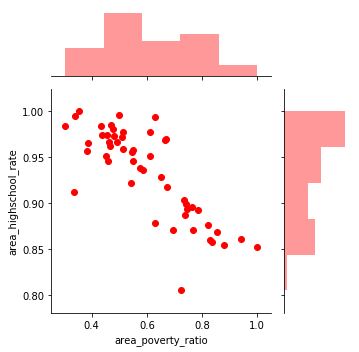

In [105]:
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
g2=sns.jointplot("area_poverty_ratio","area_highschool_rate",data=data4,size=5,ratio=3,color='r')


## Pie Chart

In [106]:
police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [107]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


In [109]:
#Race rates according in kill police data
police.race.dropna(inplace=True)
labels=police.race.value_counts().index
colors=['grey','blue','red','yellow','green','brown']
explode=[0,0,0,0,0,0]
sizes=police.race.value_counts().values



array([1201,  618,  423,   39,   31,   28])

Text(0.5,1,'Killed Police according to Races')

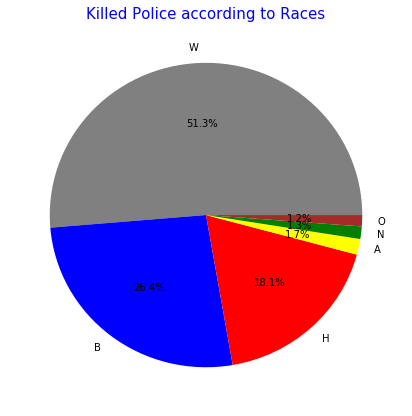

In [113]:
#visual
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Killed Police according to Races',color='blue',fontsize=15)


## Lm Plot

In [114]:
data4.head()

,area_list,area_poverty_ratio,area_highschool_rate
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


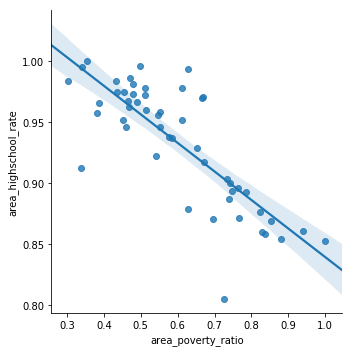

In [115]:
#visualization of high school graduation rate vs poverty rate of each state with different style of seaborn code
#implot
#show the result of a linear regression within each dataset
sns.lmplot(x='area_poverty_ratio',y='area_highschool_rate',data=data4)
plt.show()

## Kde Plot

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


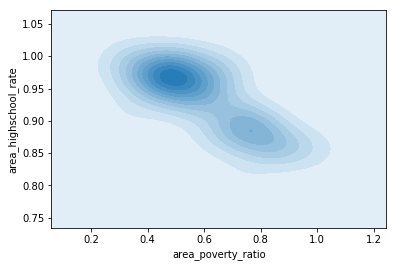

In [116]:
sns.kdeplot(data4.area_poverty_ratio,data4.area_highschool_rate,shade=True,cut=3)
plt.show()

## Violin Plot

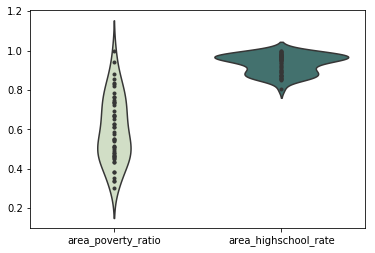

In [121]:
#show distribution with both violins and points
pal=sns.cubehelix_palette(2,rot=-0.5,dark=0.4)
sns.violinplot(data=data4,palette=pal,inner='points')
plt.show()

## Heatmap

In [122]:
data4.corr()

,area_poverty_ratio,area_highschool_rate
area_poverty_ratio,1.000000,-0.805761
area_highschool_rate,-0.805761,1.000000


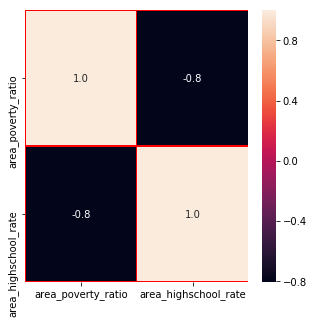

In [123]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(data4.corr(),annot=True,linewidths=0.5,linecolor='red',fmt='.1f',ax=ax)
plt.show()

## Box Plot

In [125]:
police.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

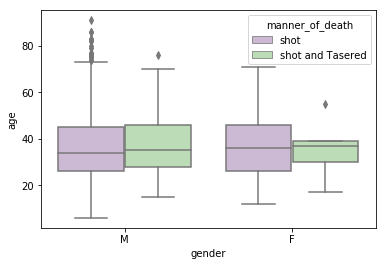

In [126]:
sns.boxplot(x='gender',y='age',hue='manner_of_death',data=police,palette='PRGn')
plt.show()

## Swarm Plot

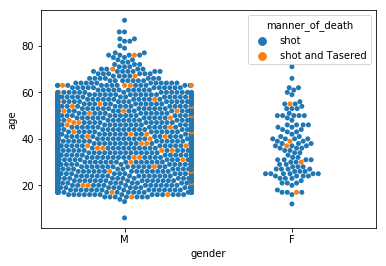

In [129]:
sns.swarmplot(x='gender',y='age',hue='manner_of_death',data=police)
plt.show()

## Pair Plot

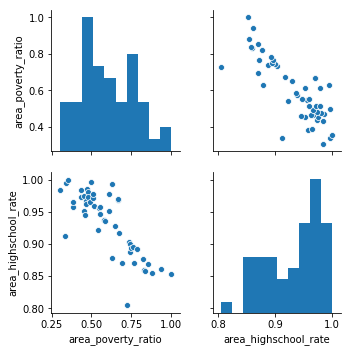

In [130]:
sns.pairplot(data4)
plt.show()

## Count Plot

In [131]:
police.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

Text(0.5,1,'gender')

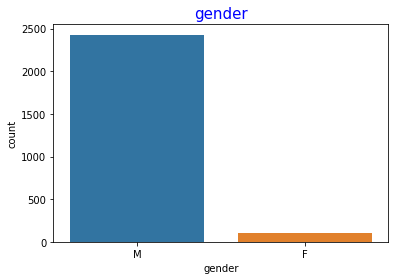

In [132]:
sns.countplot(police.gender)
plt.title('gender',color='blue',fontsize=15)

In [133]:
#kill weapon
police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [138]:
weapon=list(police.armed.unique())
armed=police.armed.value_counts()

Text(0.5,1,'Kill weapon')

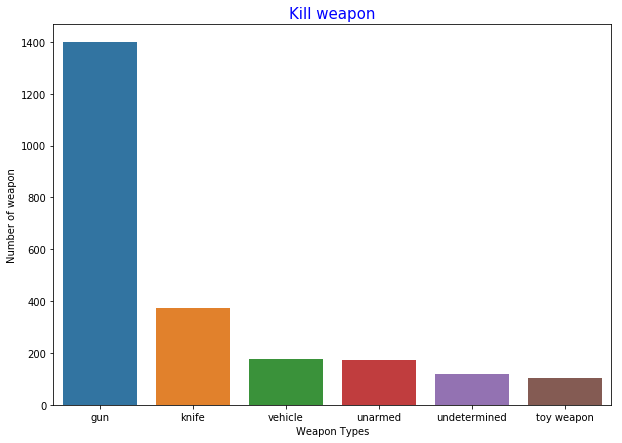

In [140]:
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:6].index,y=armed[:6].values)
plt.ylabel('Number of weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color='blue',fontsize=15)

Text(0.5,1,'Age of killed people')

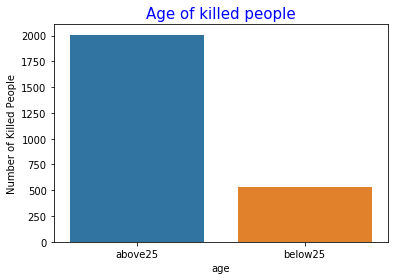

In [144]:
#age of killed police
above25=['above25' if i >=25 else'below25' for i in police.age]
df=pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color='blue',fontsize=15)


Text(0.5,1,'Race of killed people')

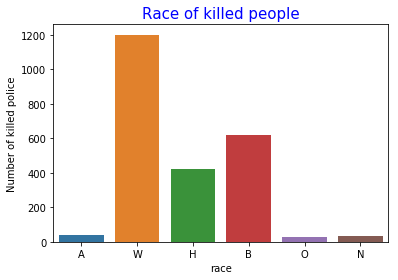

In [145]:
#Race of killed police
sns.countplot(x=police.race)
plt.ylabel('Number of killed police')
plt.title('Race of killed people',color='blue',fontsize=15)

Text(0.5,1,'Most dangerous cities')

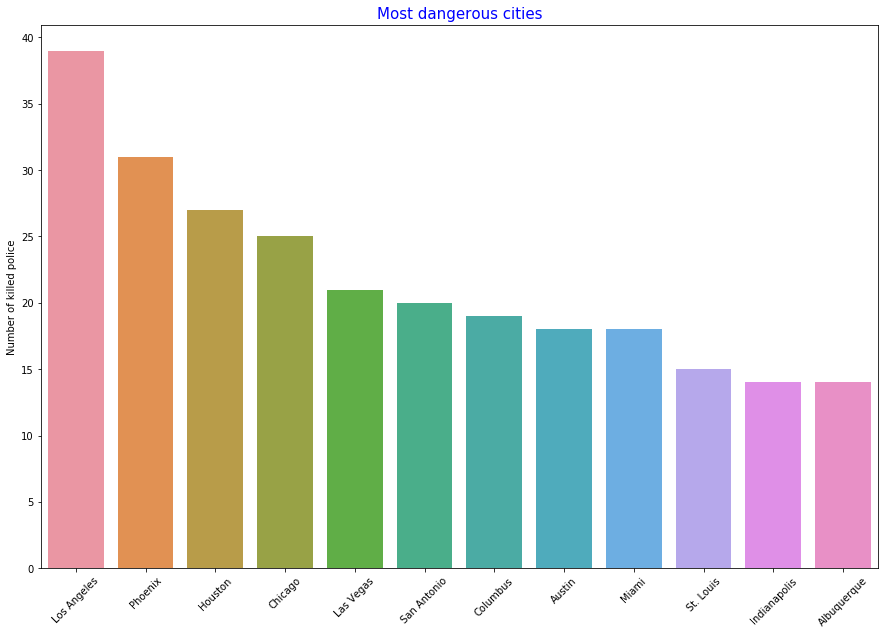

In [147]:
#Most dangerous cities
city=police.city.value_counts()
plt.figure(figsize=(15,10))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.ylabel('Number of killed police')
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color='blue',fontsize=15)

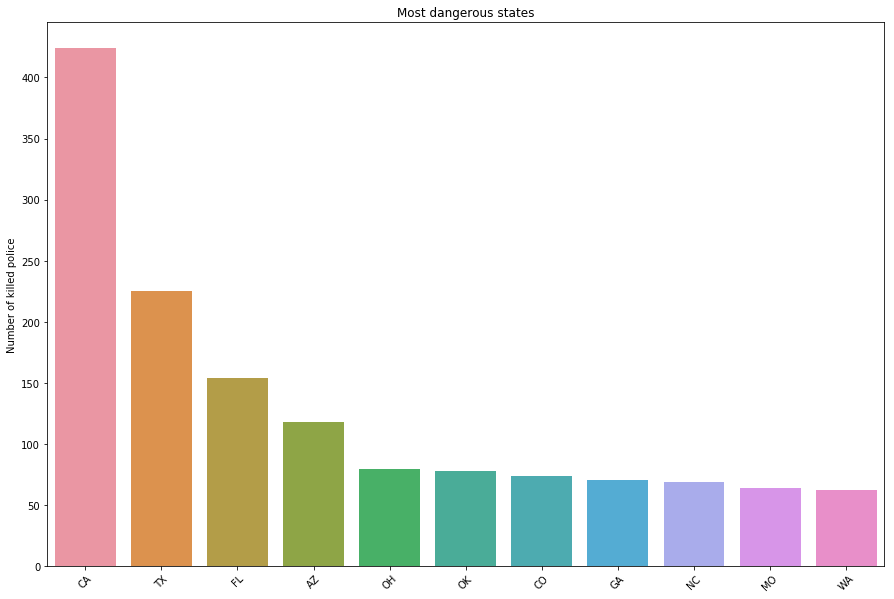

In [151]:
#most dangerous states
states=police.state.value_counts()
plt.figure(figsize=(15,10))
sns.barplot(x=states[:11].index,y=states[:11].values)
plt.xticks(rotation=45)
plt.ylabel("Number of killed police")
plt.title("Most dangerous states")
plt.show()

Text(0.5,1,'Having mental illness or not')

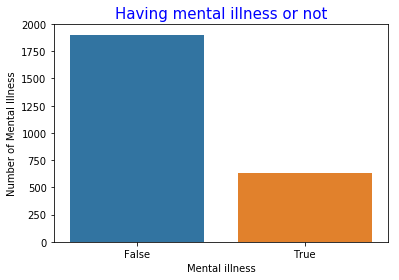

In [155]:
#Having mental illness or not for killed people
sns.countplot(police.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental Illness')
plt.title('Having mental illness or not',color='blue',fontsize=15)

Text(0.5,1,'Threat types')

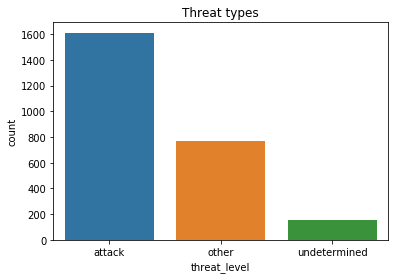

In [157]:
#Threat types
sns.countplot(police.threat_level)
plt.title('Threat types')